Realizado en ![Jupyter](https://img.shields.io/badge/-Jupyter-7fdbca?style=flat&logo=jupyter)

# Cristian Iván Parra Mesa

![logott](../images/talentotech.png)

## Importar Librerías

In [63]:
# Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import utils  # Librería personal para EDA y ETL

## Exploración del dataset

In [64]:
# Se carga y lee el dataset
df_saber = pd.read_csv("../data/saber_11.csv", sep=";")

In [65]:
# Tamaño del dataset y 5 primeras filas
print(df_saber.shape)


df_saber.head()

(546212, 10)


,ESTU_GENERO,ESTU_DEPTO_RESIDE,FAMI_ESTRATOVIVIENDA,COLE_NATURALEZA,COLE_AREA_UBICACION,COLE_JORNADA,PUNT_LECTURA_CRITICA,PUNT_MATEMATICAS,DESEMP_INGLES,PUNT_GLOBAL
0,M,MAGDALENA,Estrato 3,OFICIAL,URBANO,MAÑANA,47,48,A1,208
1,M,BOGOTÁ,Estrato 3,NO OFICIAL,URBANO,COMPLETA,60,65,A2,299
2,M,BOLIVAR,Estrato 1,OFICIAL,URBANO,MAÑANA,66,57,A2,299
3,M,BOGOTÁ,Estrato 3,OFICIAL,URBANO,MAÑANA,62,54,A1,309
4,M,BOGOTÁ,Estrato 3,OFICIAL,URBANO,MAÑANA,63,57,A1,288


Observación:

| Campo                   | Descripción                                                     |
|-------------------------|-----------------------------------------------------------------|
| ESTU_GENERO             | Género de los estudiantes.                                      |
| ESTU_DEPTO_RESIDE       | Departamento donde reside.                                      |
| FAMI_ESTRATOVIVIENDA    | Estrato socioeconómico de la vivienda.                          |
| COLE_NATURALEZA         | Tipo de colegio público o privado.                              |
| COLE_AREA_UBICACION     | Sector del colegio urbano o rural.                              |
| COLE_JORNADA            | Jornada del colegio.                                            |
| DESEMP_INGLES           | Puntaje obtenido en el área de inglés.                          |
| PUNT_LECTURA_CRITICA    | Puntaje obtenido en el área de lectura crítica.                 |
| PUNT_MATEMATICAS        | Puntaje obtenido en el área de matemáticas.                     |
| PUNT_GLOBAL             | Puntaje total obtenido por el estudiante.                       |

## Variables categóricas y numéricas

In [66]:
df_saber.info()  # Proporciona un resumen conciso del DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 546212 entries, 0 to 546211
Data columns (total 10 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   ESTU_GENERO           546212 non-null  object
 1   ESTU_DEPTO_RESIDE     545835 non-null  object
 2   FAMI_ESTRATOVIVIENDA  546186 non-null  object
 3   COLE_NATURALEZA       546212 non-null  object
 4   COLE_AREA_UBICACION   546212 non-null  object
 5   COLE_JORNADA          546212 non-null  object
 6   PUNT_LECTURA_CRITICA  546212 non-null  int64 
 7   PUNT_MATEMATICAS      546212 non-null  int64 
 8   DESEMP_INGLES         546212 non-null  object
 9   PUNT_GLOBAL           546212 non-null  int64 
dtypes: int64(3), object(7)
memory usage: 41.7+ MB


In [67]:
utils.verificar_tipo_datos_y_nulos(df_saber)

,nombre_campo,tipo_datos,no_nulos_%,nulos_%,nulos
1,ESTU_DEPTO_RESIDE,"[<class 'str'>, <class 'float'>]",99.93,0.07,377
0,ESTU_GENERO,[<class 'str'>],100.00,0.00,0
2,FAMI_ESTRATOVIVIENDA,"[<class 'str'>, <class 'float'>]",100.00,0.00,26
3,COLE_NATURALEZA,[<class 'str'>],100.00,0.00,0
4,COLE_AREA_UBICACION,[<class 'str'>],100.00,0.00,0
5,COLE_JORNADA,[<class 'str'>],100.00,0.00,0
6,PUNT_LECTURA_CRITICA,[<class 'int'>],100.00,0.00,0
7,PUNT_MATEMATICAS,[<class 'int'>],100.00,0.00,0
8,DESEMP_INGLES,[<class 'str'>],100.00,0.00,0
9,PUNT_GLOBAL,[<class 'int'>],100.00,0.00,0


Observaciones
- Se observa que Departamento y Estrato presentan nulos en el dataset
- Los registros REsidencia y Estrato, presentan dos tipos de datos, lo cual no es ideal
- Se tienen en total 3 variables numéricas y 7 categóricas

### En la siguiente gráfica analizamos las variables categóricas

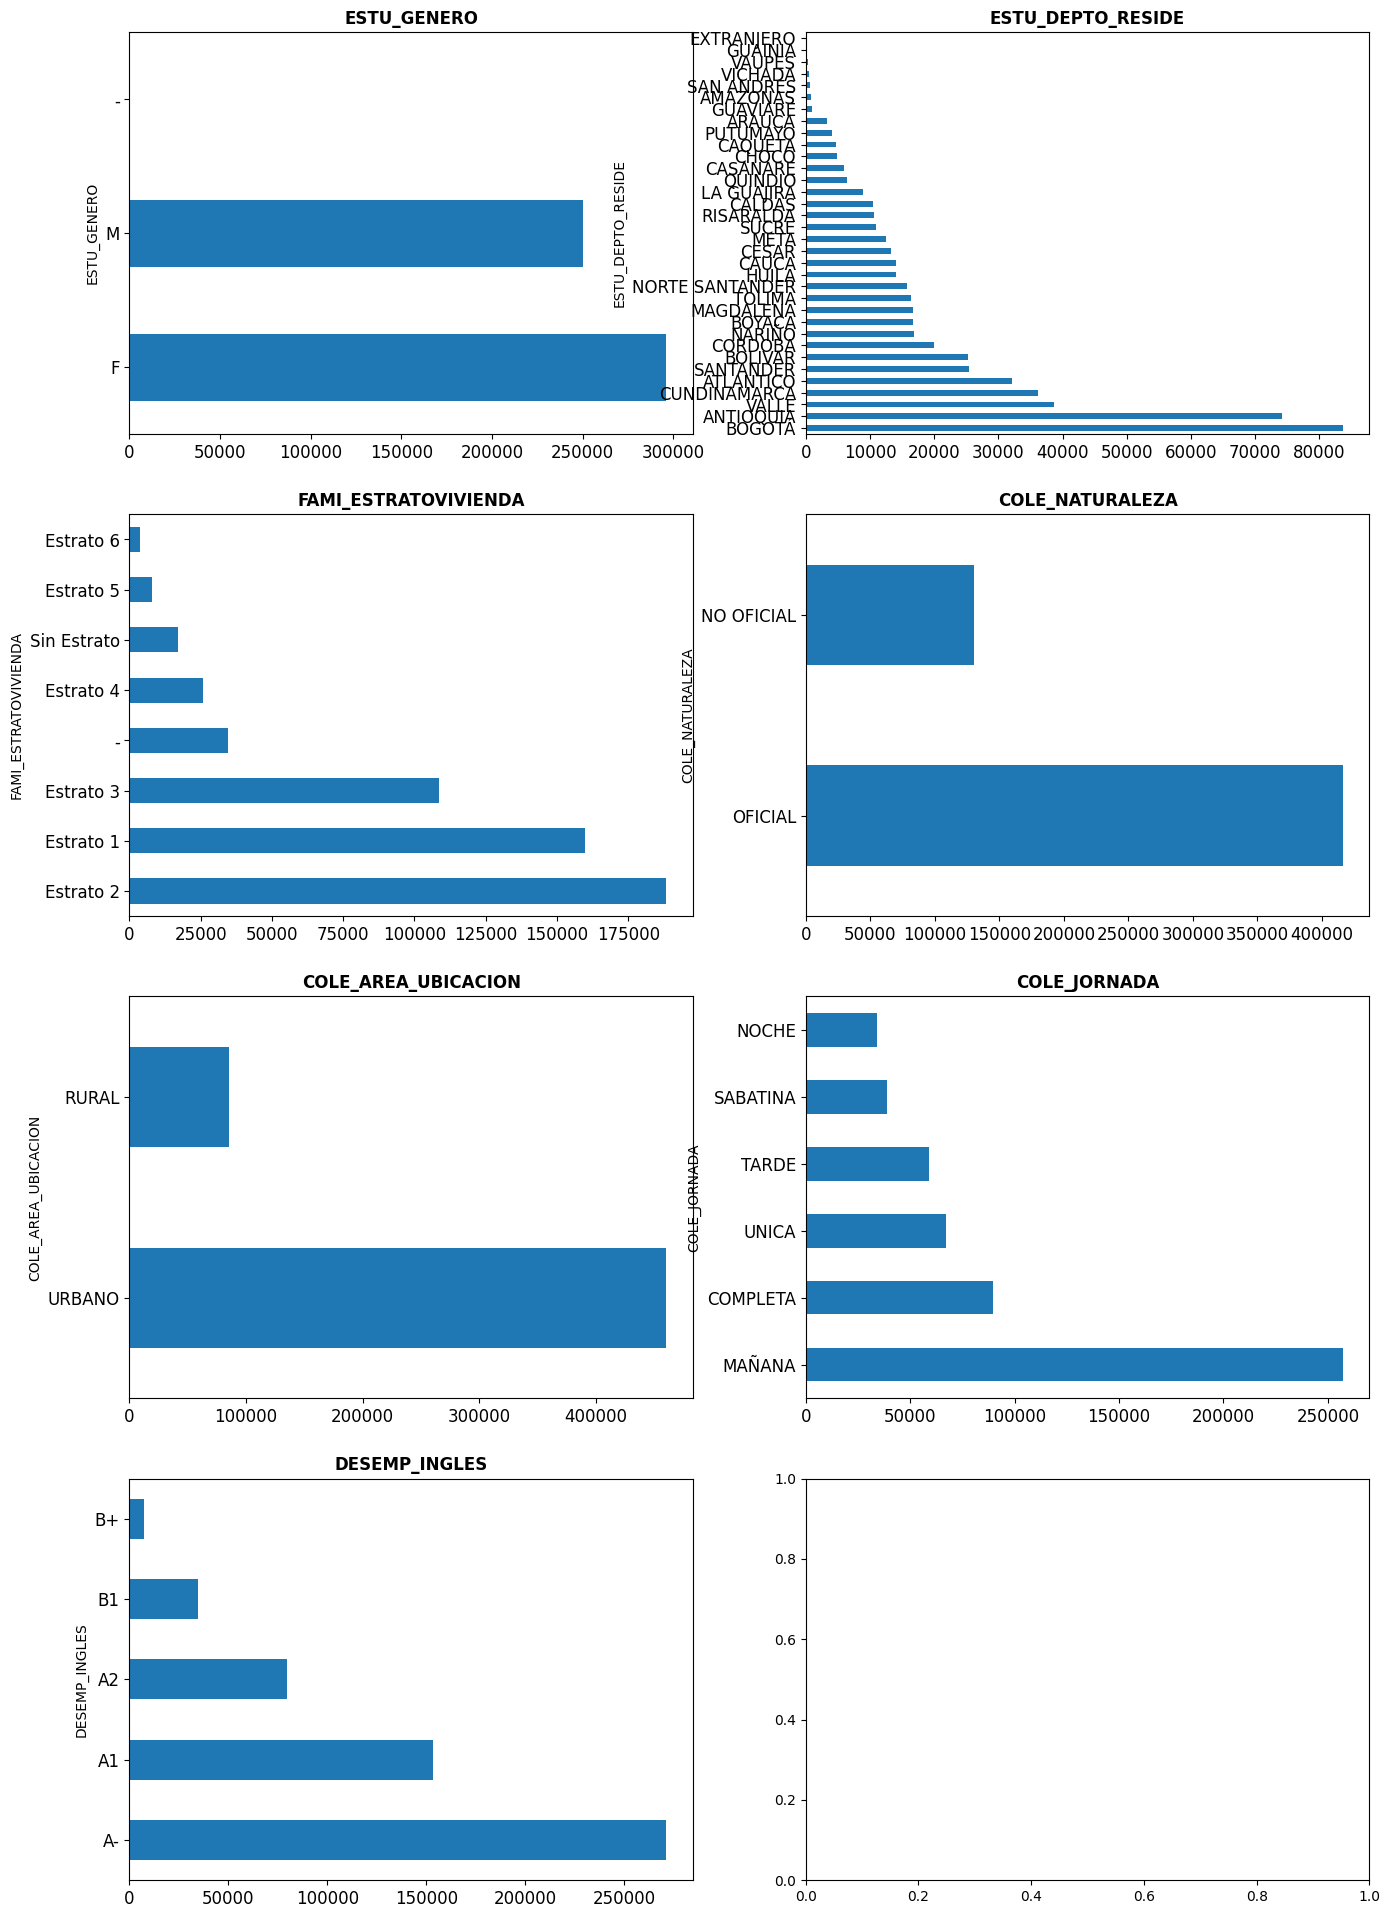

In [68]:
utils.graficos_eda_categoricos(df_saber.select_dtypes("O"))

Conclusiones
- Se observa que género presenta valores con datos tipo (-), se decide imputar estos valores por el género "Otro"  para no perder información.
- Se observa que Estrato tiene datos tipo (-), se decide imputar por "Sin estrato"
- Se eliminan los registro nulos de Departamento, ya que no sería correcto imputar por Bogotá ques la más predominante, lo mejor sería una trazabilidad del dato, pero en este caso no es posible
- Las demás variables categóricas no presentan anomalías

### Para las variables numéricas se realiza un análisis de estadísticos

In [69]:
utils.estadisticos_cont(df_saber.select_dtypes("number"))

,count,mean,median,std,min,25%,50%,75%,max
PUNT_LECTURA_CRITICA,546212.0,52.157305,52.0,10.537963,0.0,45.0,52.0,60.0,100.0
PUNT_MATEMATICAS,546212.0,50.606349,51.0,11.997649,0.0,42.0,51.0,59.0,100.0
PUNT_GLOBAL,546212.0,246.186464,243.0,51.386858,0.0,207.0,243.0,282.0,477.0


Conclusiones
- No se observan anomalías
- El puntaje máximo global es de 477
- El 75% de los estudiantes presenta puntuación máxima de 60 para compresión lectora y de matemáticas

## Limpieza de los Datos

Basados en la exploración de datos anterior, se imputarán datos del campo Género y se revisaran duplicados

In [70]:
# Eliminamos duplicados
print(
    f"Tamaño del set antes de eliminar las filas repetidas: {df_saber.shape}"
)  # -> se visualiza el tamaño de df_saber antes de eliminar filas repetidas.

df_saber.drop_duplicates(
    inplace=True
)  # -> busca filas que estén repetidas 2 o mas veces y deja solo la versión original y las repeticiones las elimina.

print(
    f"Tamaño del set después de eliminar las filas repetidas: {df_saber.shape}"
)  # -> se visualiza el tamaño de la df_saber después de eliminar filas repetidas.

Tamaño del set antes de eliminar las filas repetidas: (546212, 10)
Tamaño del set después de eliminar las filas repetidas: (542175, 10)


In [71]:
# Eliminamos los nulos basados en la columna departamento
df_saber.dropna(subset=["ESTU_DEPTO_RESIDE"], inplace=True)

In [72]:
# Verificamos nulos nuevamente
utils.verificar_tipo_datos_y_nulos(df_saber)

,nombre_campo,tipo_datos,no_nulos_%,nulos_%,nulos
0,ESTU_GENERO,[<class 'str'>],100.0,0.0,0
1,ESTU_DEPTO_RESIDE,[<class 'str'>],100.0,0.0,0
2,FAMI_ESTRATOVIVIENDA,[<class 'str'>],100.0,0.0,0
3,COLE_NATURALEZA,[<class 'str'>],100.0,0.0,0
4,COLE_AREA_UBICACION,[<class 'str'>],100.0,0.0,0
5,COLE_JORNADA,[<class 'str'>],100.0,0.0,0
6,PUNT_LECTURA_CRITICA,[<class 'int'>],100.0,0.0,0
7,PUNT_MATEMATICAS,[<class 'int'>],100.0,0.0,0
8,DESEMP_INGLES,[<class 'str'>],100.0,0.0,0
9,PUNT_GLOBAL,[<class 'int'>],100.0,0.0,0


Conclusiones
- Se observa que al eliminar duplicados y los registros que no tenían información del departamento, ya no se tiene datos con dos tipos de formato y ya no se presentan nulos, por los tanto se procede a seguir con la limpieza de datos con el tipo "-"

In [73]:
# Se reemplaza (-) por 'Sin estrato' en la columna FAMI_ESTRATOVIVIENDA
df_saber["FAMI_ESTRATOVIVIENDA"] = df_saber["FAMI_ESTRATOVIVIENDA"].replace(
    "-", "Sin Estrato"
)

# Se reemplaza (-) por 'Otro' en la columna ESTU_GENERO
df_saber["ESTU_GENERO"] = df_saber["ESTU_GENERO"].replace("-", "Otro")

## Revisamos nuevamente las gráficas categóricas

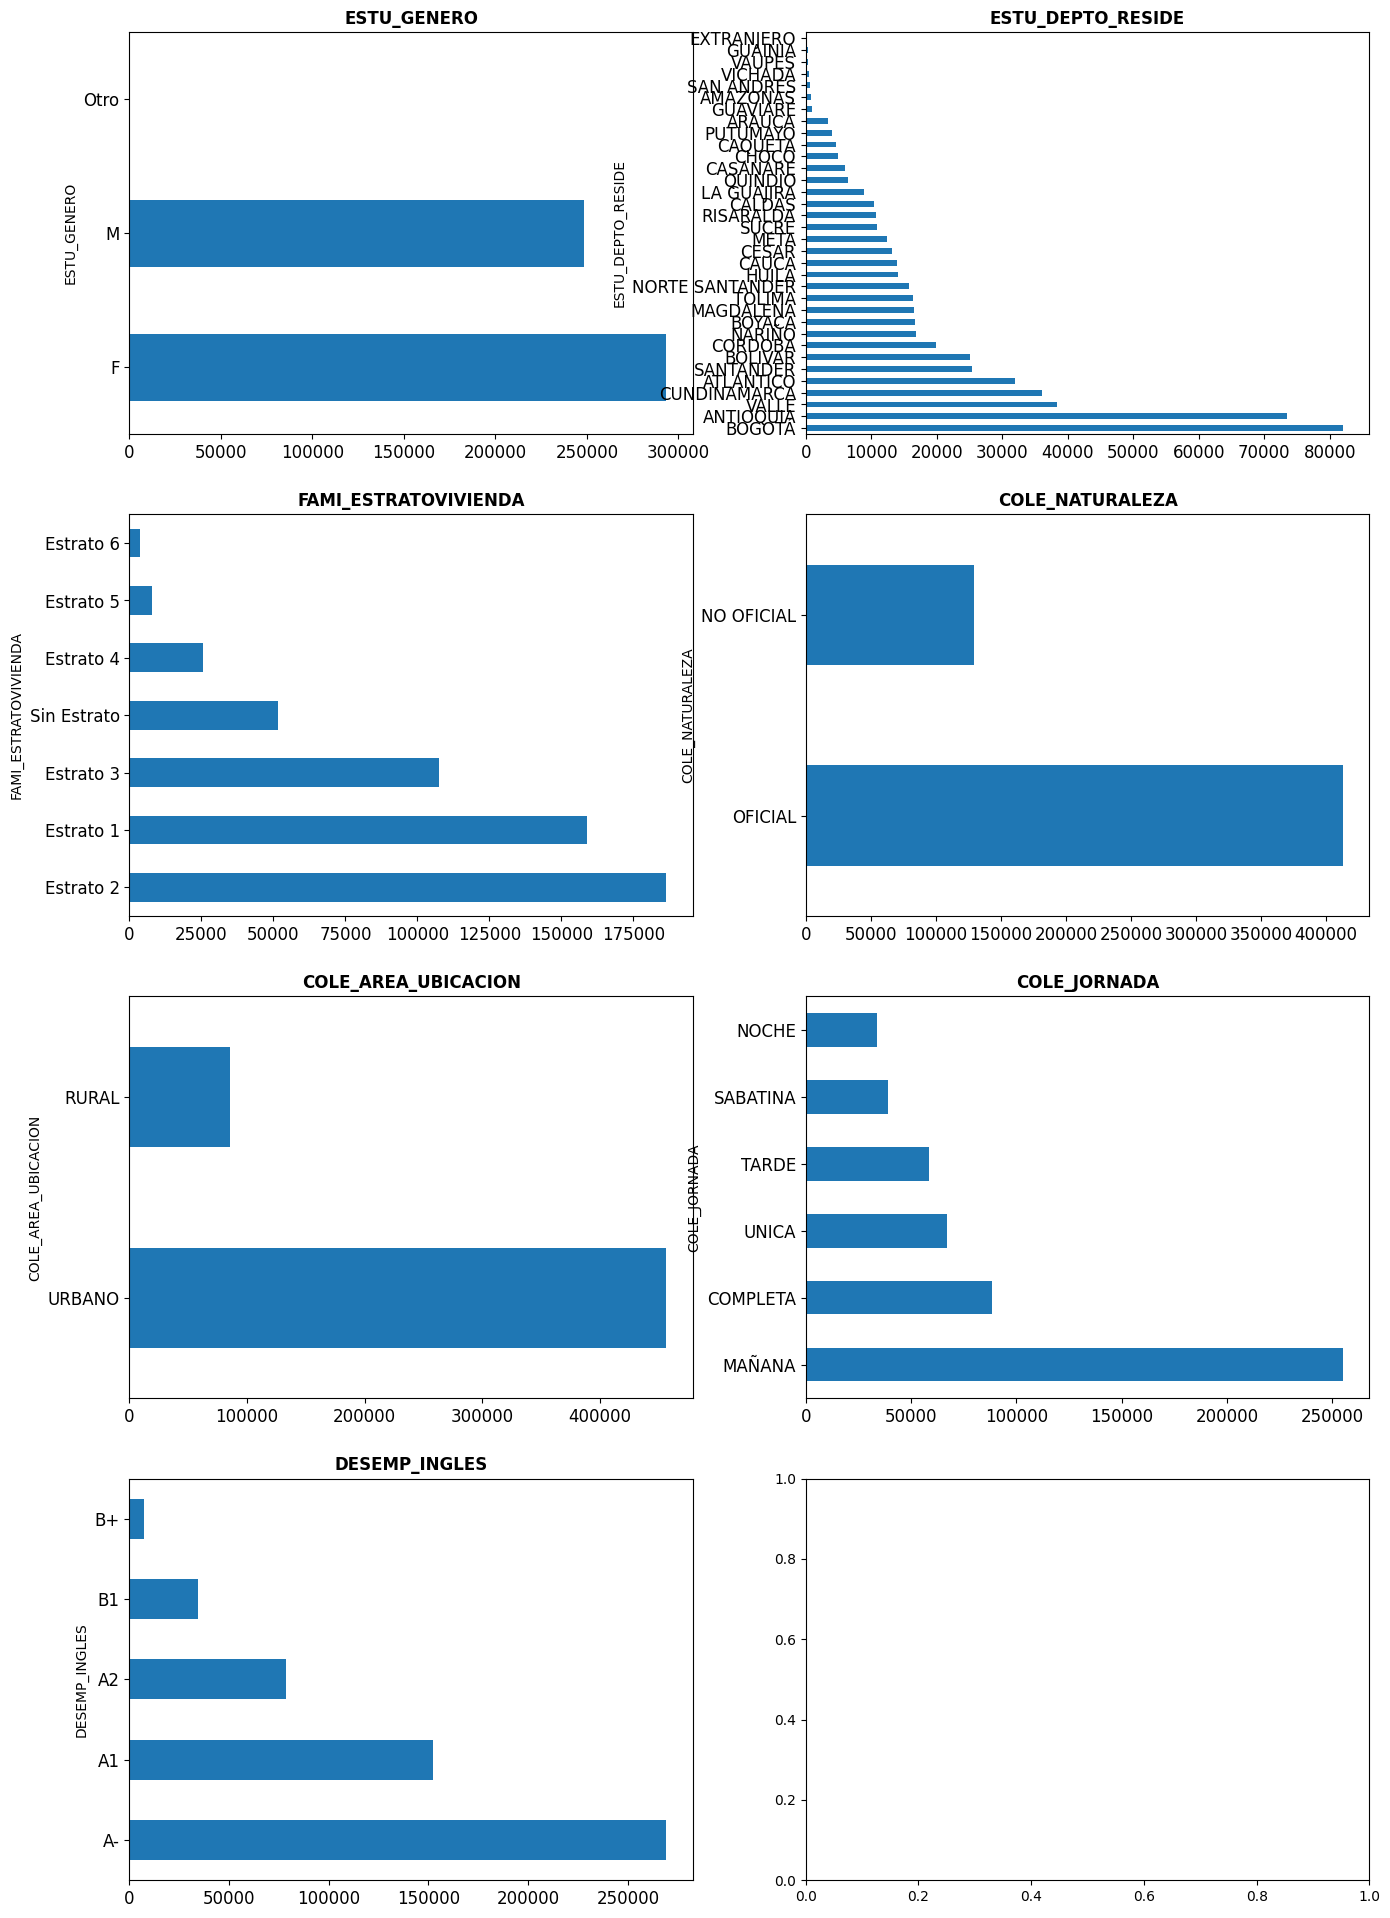

In [74]:
utils.graficos_eda_categoricos(df_saber.select_dtypes("O"))

In [78]:
# Tamaño final
df_saber.shape

(541798, 10)

¡Y listo, se ha realizado la limpieza de nuestro set de datos!

Originalmente tenía 546212 registros y 10 columnas. El dataset resultante tiene 541798 filas (4414 menos) y 10 columnas.

El set de datos ya está listo para el Análisis Exploratorio.